# Import Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Read file and understand

In [6]:
df = pd.read_csv("data/Admission_Predict_Ver1.1.csv")

In [7]:
df.shape

(500, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(columns=["Serial No."], inplace=True)

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# split data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [22]:
# we know upper bound in this case, we will use MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create model

In [33]:
model = Sequential()

model.add(Dense(7, activation="relu", input_dim=7))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="linear")) # use liner if regression problem if not use sigmoid

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss="mean_squared_error", optimizer="Adam")

In [36]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 12ms/step - loss: 0.1409 - val_loss: 0.1086
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0708 - val_loss: 0.0502
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0325 - val_loss: 0.0303
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 0.0305
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0248 - val_loss: 0.0284
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0227 - val_loss: 0.0259
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0214 - val_loss: 0.0247
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.0235
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.0223
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.0212
Epoch 11

In [37]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 1000us/step


In [38]:
r2_score(y_test, y_pred)

0.8008874613164207

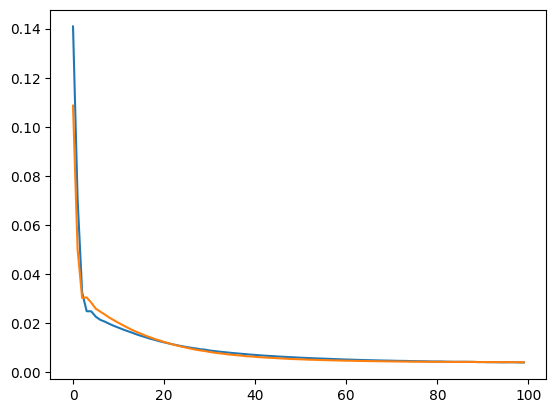

In [41]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])